In [1]:
import tensorflow as tf

from six.moves import xrange 
from constants import IMAGE_PIXELS, OUTPUT

# Data
import input_data

# Model
import model2 as model

In [2]:
# Import data
data = input_data.read_data_sets(f=0.9)

In [3]:
class FLAGS:
    pass

FLAGS.batch_size = 100
FLAGS.learning_rate = 0.01
FLAGS.log_dir = "/tmp/tensorflow/FacialKeypointsDetection/logs"
FLAGS.dropout = 0.9
FLAGS.MODEL_VERSION = "v1"

In [4]:
def feed_dict(input_type):
    """Make a TensorFlow feed_dict: maps data onto Tensor placeholders."""
    if input_type == 'train_batch':
        xs, ys = data.train.next_batch(FLAGS.batch_size)
        k = FLAGS.dropout
    elif input_type == 'train_set':
        xs, ys = data.train.images, data.train.labels
        k = 1.0
    else:
        xs, ys = data.test.images, data.test.labels
        k = 1.0
    return {x: xs, y_: ys, keep_prob: k}

In [5]:
reload(model)

tf.reset_default_graph()
try:
    train_writer.close()
    test_writer.close()
except:
    pass

FLAGS.MODEL_VERSION = "v1"
FLAGS.learning_rate = 0.1

# Input placeholders
with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, [None, IMAGE_PIXELS], name="input")
with tf.name_scope('output'):
    y_ = tf.placeholder(tf.float32, [None, OUTPUT], name="output")
# Dropout
with tf.name_scope('dropout'):
    keep_prob = tf.placeholder(tf.float32)
tf.summary.scalar('dropout_keep_probability', keep_prob)

y = model.inference(x, keep_prob)
loss = model.loss(y, y_)
train_op = model.training(loss, FLAGS.learning_rate)
eval_correct = model.evaluation(y, y_)
init = tf.global_variables_initializer()
data.train.reset_epochs()
#sess = tf.Session()
sess = tf.InteractiveSession()
sess.run(init)
ep = 0
# Create a summary to monitor cost tensor
tf.summary.scalar("loss", loss)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()

# op to write logs to Tensorboard
train_writer = tf.summary.FileWriter(FLAGS.log_dir + "/" + FLAGS.MODEL_VERSION + '/train', sess.graph)
test_writer = tf.summary.FileWriter(FLAGS.log_dir + "/" + FLAGS.MODEL_VERSION + '/test')

In [6]:
# Training cycle
k = 0
while k < 100:
    steps_per_epoch = data.train.num_examples/FLAGS.batch_size
    for i in range(steps_per_epoch):
        sess.run(train_op, feed_dict=feed_dict('train_batch'))
        
    if ep % 5 == 0 and ep > 10:
        summary, test_score = sess.run([merged_summary_op, eval_correct], feed_dict=feed_dict('train_set'))
        train_writer.add_summary(summary, ep + 1)
        
        summary, train_score = sess.run([merged_summary_op, eval_correct], feed_dict=feed_dict('test_set'))
        test_writer.add_summary(summary, ep + 1)
        
        print "Epoch: %d Train Score: %0.05f Test Score: %0.05f" % (ep + 1, train_score, test_score)
        train_writer.flush()
        test_writer.flush()
    k += 1
    ep += 1

Epoch: 16 Train Score: 0.00876 Test Score: 0.00869
Epoch: 21 Train Score: 0.00878 Test Score: 0.00867
Epoch: 26 Train Score: 0.01739 Test Score: 0.01725
Epoch: 31 Train Score: 0.00723 Test Score: 0.00701
Epoch: 36 Train Score: 0.00700 Test Score: 0.00678
Epoch: 41 Train Score: 0.00668 Test Score: 0.00640
Epoch: 46 Train Score: 0.00638 Test Score: 0.00608
Epoch: 51 Train Score: 0.00630 Test Score: 0.00592
Epoch: 56 Train Score: 0.00597 Test Score: 0.00562
Epoch: 61 Train Score: 0.00580 Test Score: 0.00541
Epoch: 66 Train Score: 0.00581 Test Score: 0.00544
Epoch: 71 Train Score: 0.00551 Test Score: 0.00508
Epoch: 76 Train Score: 0.00528 Test Score: 0.00487
Epoch: 81 Train Score: 0.00547 Test Score: 0.00507
Epoch: 86 Train Score: 0.00539 Test Score: 0.00500
Epoch: 91 Train Score: 0.00512 Test Score: 0.00470
Epoch: 96 Train Score: 0.00477 Test Score: 0.00432


In [7]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Visualization
from plot_samples import plot_samples

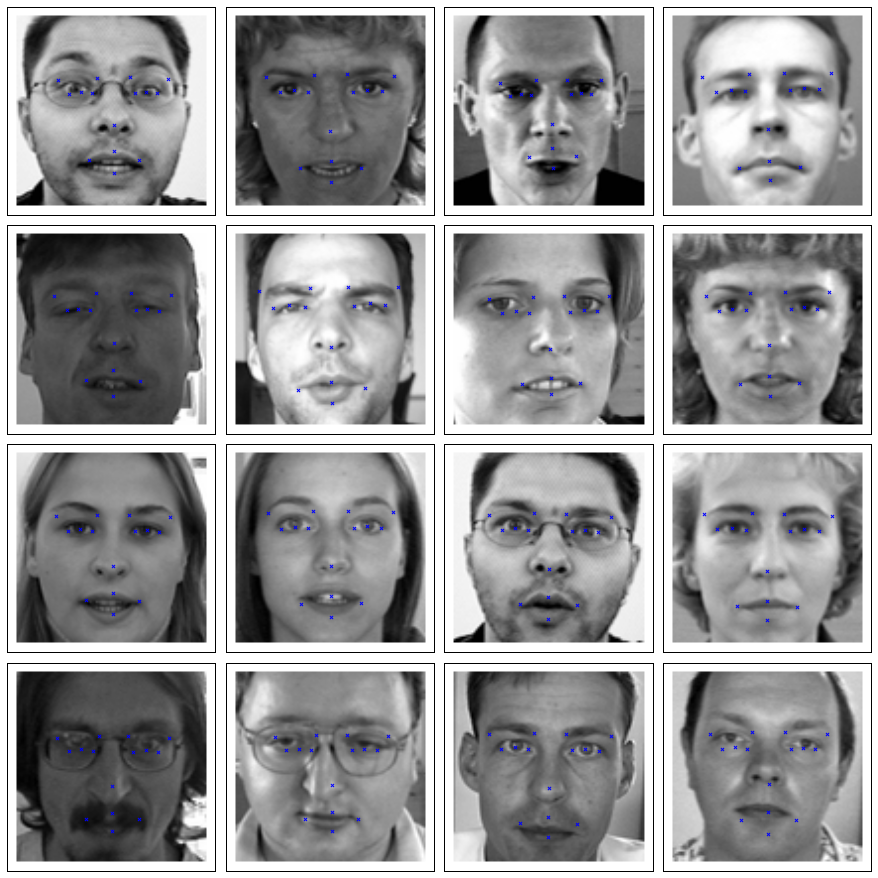

In [8]:
X_pred = data.predict.images
y_pred = sess.run(y, feed_dict={x: X_pred, keep_prob:1.0})
plot_samples(X_pred, y_pred)

In [9]:
from write_submission import write_submission

In [10]:
y_pred = sess.run(y, feed_dict={x: X_pred, keep_prob:1.0})

In [11]:
write_submission(y_pred)

Wrote submission/submission-2017-01-10T20-31-09.299513.csv
